In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Female    112
Male       88
Name: Gender, dtype: int64


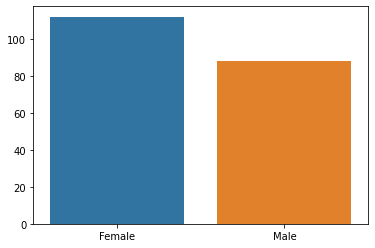

In [5]:
gender=data['Gender'].value_counts()
sns.barplot(x=gender.index,y=gender.values)
print(gender)

In [6]:
# maximum number of customer are females

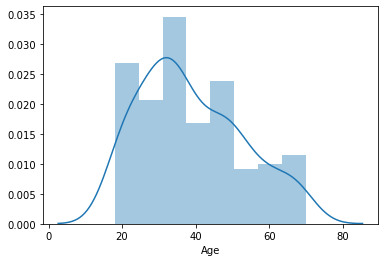

In [7]:
sns.distplot(data['Age'])

In [8]:
# more number of customer are in the age from 30 to 40 years

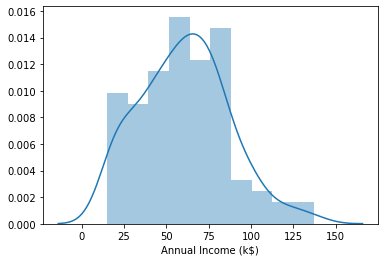

In [9]:
sns.distplot(data['Annual Income (k$)'])

In [10]:
# more frequent customer have Annual Income(k$) from 50 to 80

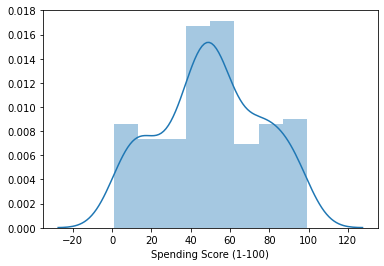

In [11]:
sns.distplot(data['Spending Score (1-100)'])

In [12]:
# more frequent customers have spending score in between 40 to 60 

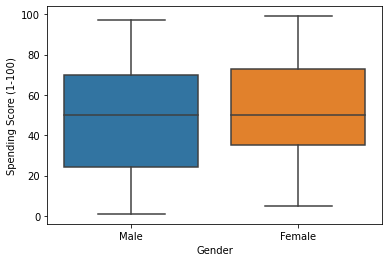

In [13]:
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=data)

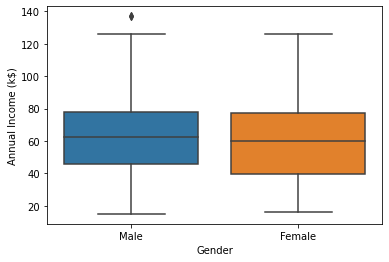

In [14]:
sns.boxplot(x='Gender',y='Annual Income (k$)',data=data)

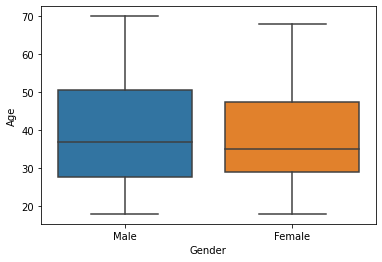

In [15]:
sns.boxplot(x='Gender',y='Age',data=data)

Text(0, 0.5, 'Spending_score')

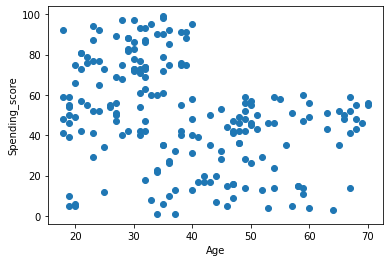

In [16]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending_score')

In [17]:
# customers having age in between 20 to 40 have higher spending score as compared to 40 to 70

Text(0, 0.5, 'Annual Income (k$)')

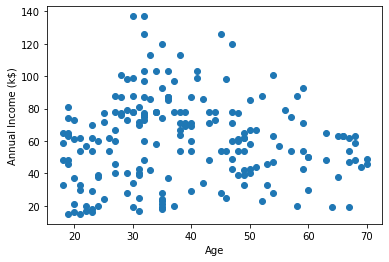

In [18]:
plt.scatter(data['Age'],data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

In [19]:
# customer having age in between 30 to 50 have higher annual income

Text(0, 0.5, 'Annual Income (k$)')

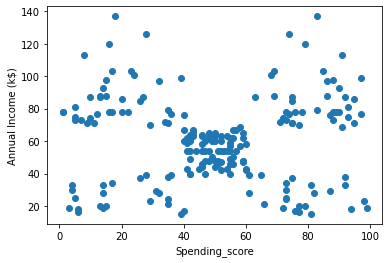

In [20]:
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'])
plt.xlabel('Spending_score')
plt.ylabel('Annual Income (k$)')

In [21]:
# this scatter plot gives some idea about cluster formation

In [22]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


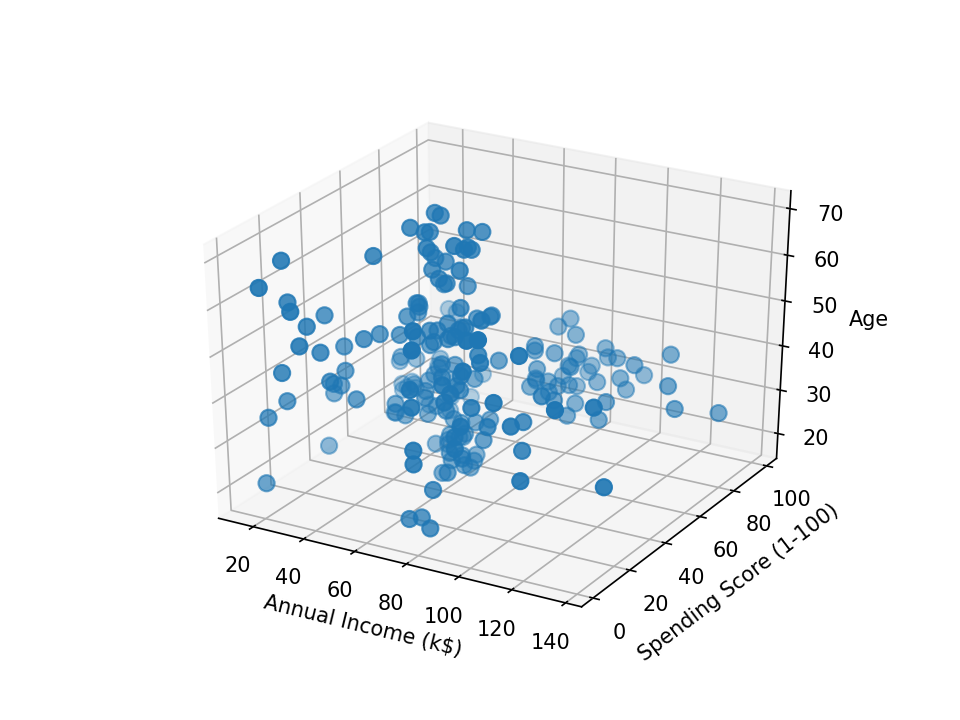

Text(0.5, 0, 'Age')

In [23]:
%matplotlib notebook
fig=plt.figure()
ax=fig.add_subplot(projection = '3d')
ax.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],data['Age'],s=60)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
ax.set_zlabel('Age')

In [24]:
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [25]:
wcss=[]
from sklearn.cluster import KMeans
for i in range(1,16):
    model=KMeans(n_clusters=i)
    model.fit(data.iloc[:,1:])
    wcss.append(model.inertia_)

<IPython.core.display.Javascript object>


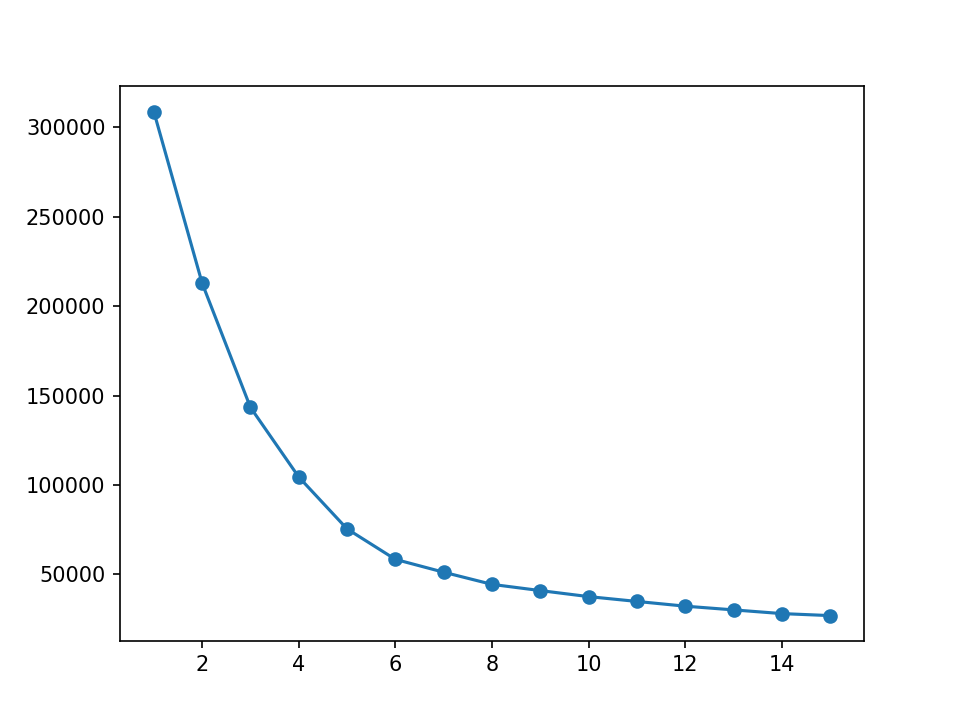

In [26]:
plt.plot(range(1,16),wcss,marker = 'o')
plt.show()

In [27]:
model=KMeans(n_clusters=5,random_state=42)
data['cluster']=model.fit_predict(data.iloc[:,1:])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


<IPython.core.display.Javascript object>


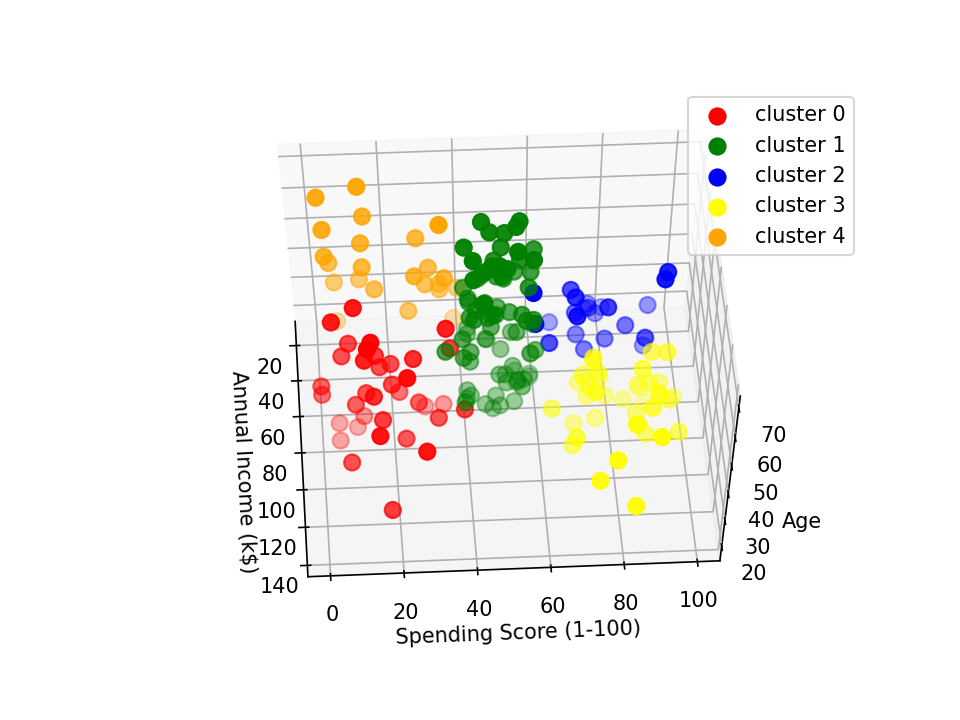

In [28]:
fig=plt.figure()
ax=fig.add_subplot(projection = '3d')
ax.scatter(data[data.cluster==0]['Annual Income (k$)'],data[data.cluster==0]['Spending Score (1-100)'],data[data.cluster==0]['Age'],c='red',s=60,label='cluster 0')
ax.scatter(data[data.cluster==1]['Annual Income (k$)'],data[data.cluster==1]['Spending Score (1-100)'],data[data.cluster==1]['Age'],c='green',s=60,label='cluster 1')
ax.scatter(data[data.cluster==2]['Annual Income (k$)'],data[data.cluster==2]['Spending Score (1-100)'],data[data.cluster==2]['Age'],c='blue',s=60,label='cluster 2')
ax.scatter(data[data.cluster==3]['Annual Income (k$)'],data[data.cluster==3]['Spending Score (1-100)'],data[data.cluster==3]['Age'],c='yellow',s=60,label='cluster 3')
ax.scatter(data[data.cluster==4]['Annual Income (k$)'],data[data.cluster==4]['Spending Score (1-100)'],data[data.cluster==4]['Age'],c='orange',s=60,label='cluster 4')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.legend()

<IPython.core.display.Javascript object>


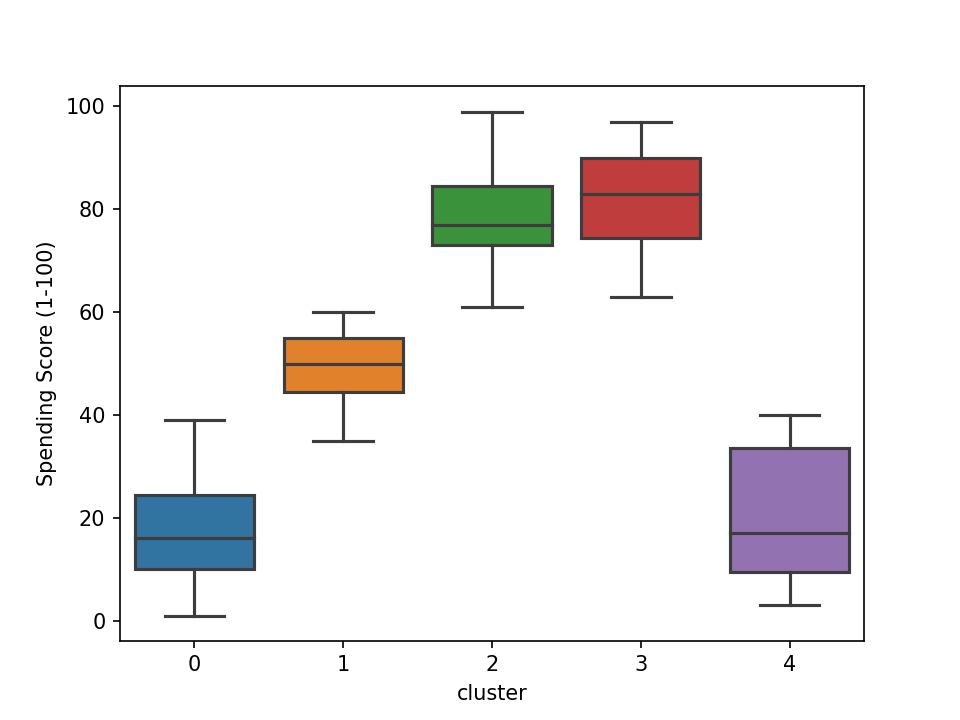

In [29]:
sns.boxplot(x='cluster',y='Spending Score (1-100)',data=data)

In [ ]:
# Cluster 2 and 3 have high spending score as compared to others

<IPython.core.display.Javascript object>


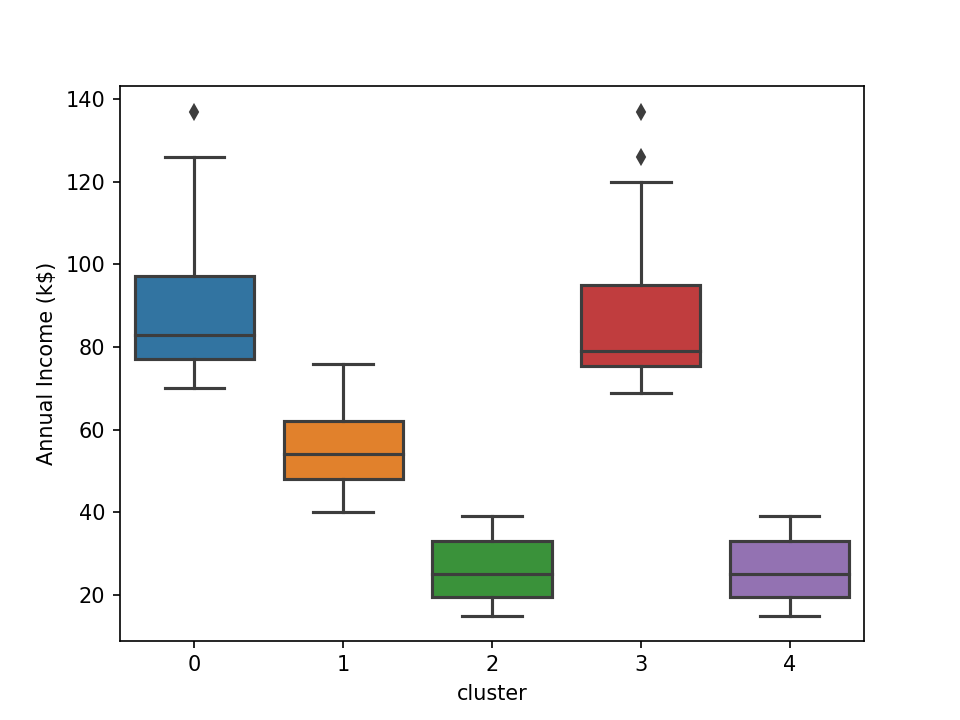

In [30]:
sns.boxplot(x='cluster',y='Annual Income (k$)',data=data)

In [ ]:
# Cluster 0 and 3 have high annual income as compared to others

<IPython.core.display.Javascript object>


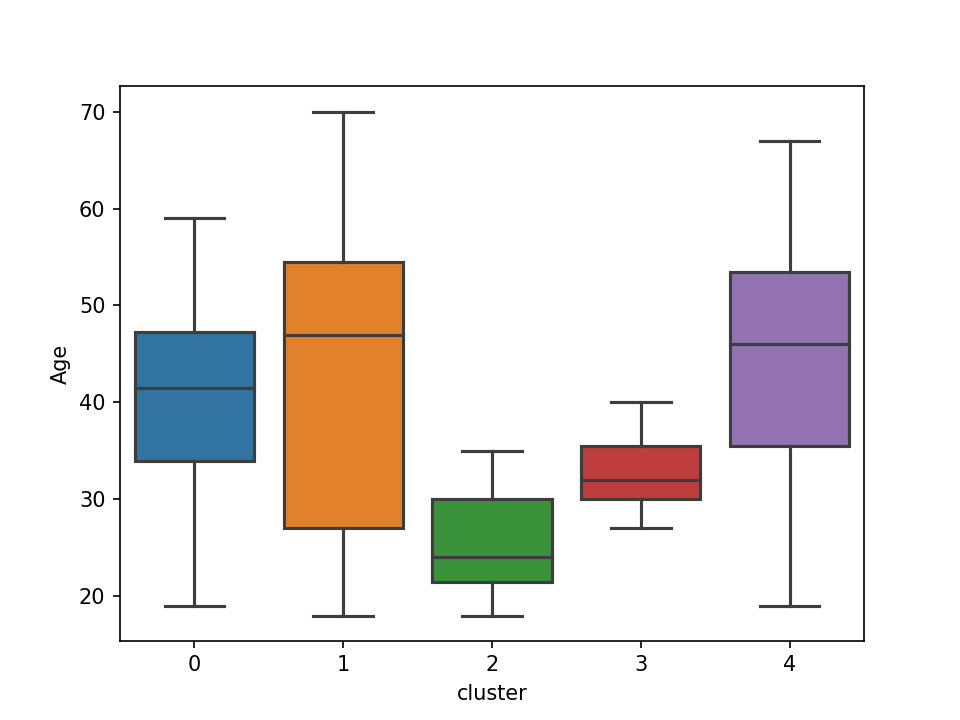

In [31]:
sns.boxplot(x='cluster',y='Age',data=data)

In [ ]:
# Cluster 2 has age ranges from 20 to 30 and Cluster 3 has age ranges from 30 to 40

In [35]:
cluster0=dict(data[data['cluster']==0]['Gender'].value_counts())
cluster1=dict(data[data['cluster']==1]['Gender'].value_counts())
cluster2=dict(data[data['cluster']==2]['Gender'].value_counts())
cluster3=dict(data[data['cluster']==3]['Gender'].value_counts())
cluster4=dict(data[data['cluster']==4]['Gender'].value_counts())

In [55]:
new = pd.DataFrame([cluster0,cluster1,cluster2,cluster3,cluster4])

In [47]:
s=new.sum(axis=1)

In [49]:
for i in range(len(new)):
    new.iloc[i,:] = new.iloc[i,:]/s[i]

<IPython.core.display.Javascript object>


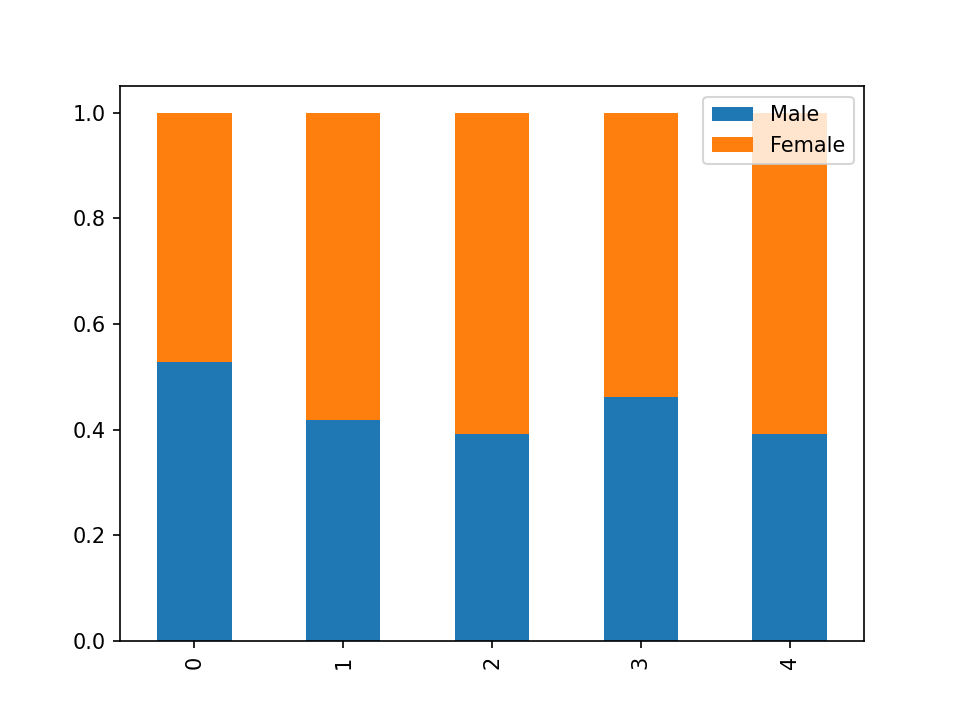

In [54]:
new.plot(kind='bar',stacked=True)
plt.legend(["Male","Female"])

In [ ]:
# In cluster 2 proportion female consumer is higher as compared to male but in cluster 3 both are balanced